# Projet Final Apprentissage Automatique pour la Science des Données

auteurs : Akram Farihi, Amalya Mourih, Sami Ablaoui, Rania Sellah

Dans ce projet, nous allons implémenter, evaluer et benchmark un système de classification multicalss en ML. Nous allons étudier l'affectation sur la santé de consommation de caféine à partir d'un jeux des données 

## 1. Selection des données et analyse exploiratoire

Nous avons séléctionner ces données pour notre projet  :

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")

print("Path to dataset files:", path)

c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\amaly\.cache\kagglehub\datasets\uom190346a\global-coffee-health-dataset\versions\1


In [3]:
import pandas as pd

df = pd.read_csv(f"{path}/synthetic_coffee_health_10000.csv")
df.head()
print(f"\nDimensions: {df.shape}")
print(f"\nTypes de données:\n{df.dtypes}")
print(f"\nValeurs manquantes:\n{df.isnull().sum()}")
print(f"\nStatistiques descriptives:\n{df.describe()}")


Dimensions: (10000, 16)

Types de données:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Valeurs manquantes:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_


Distribution de Stress_Level:
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64

Proportions:
Stress_Level
Low       0.6989
Medium    0.2050
High      0.0961
Name: proportion, dtype: float64


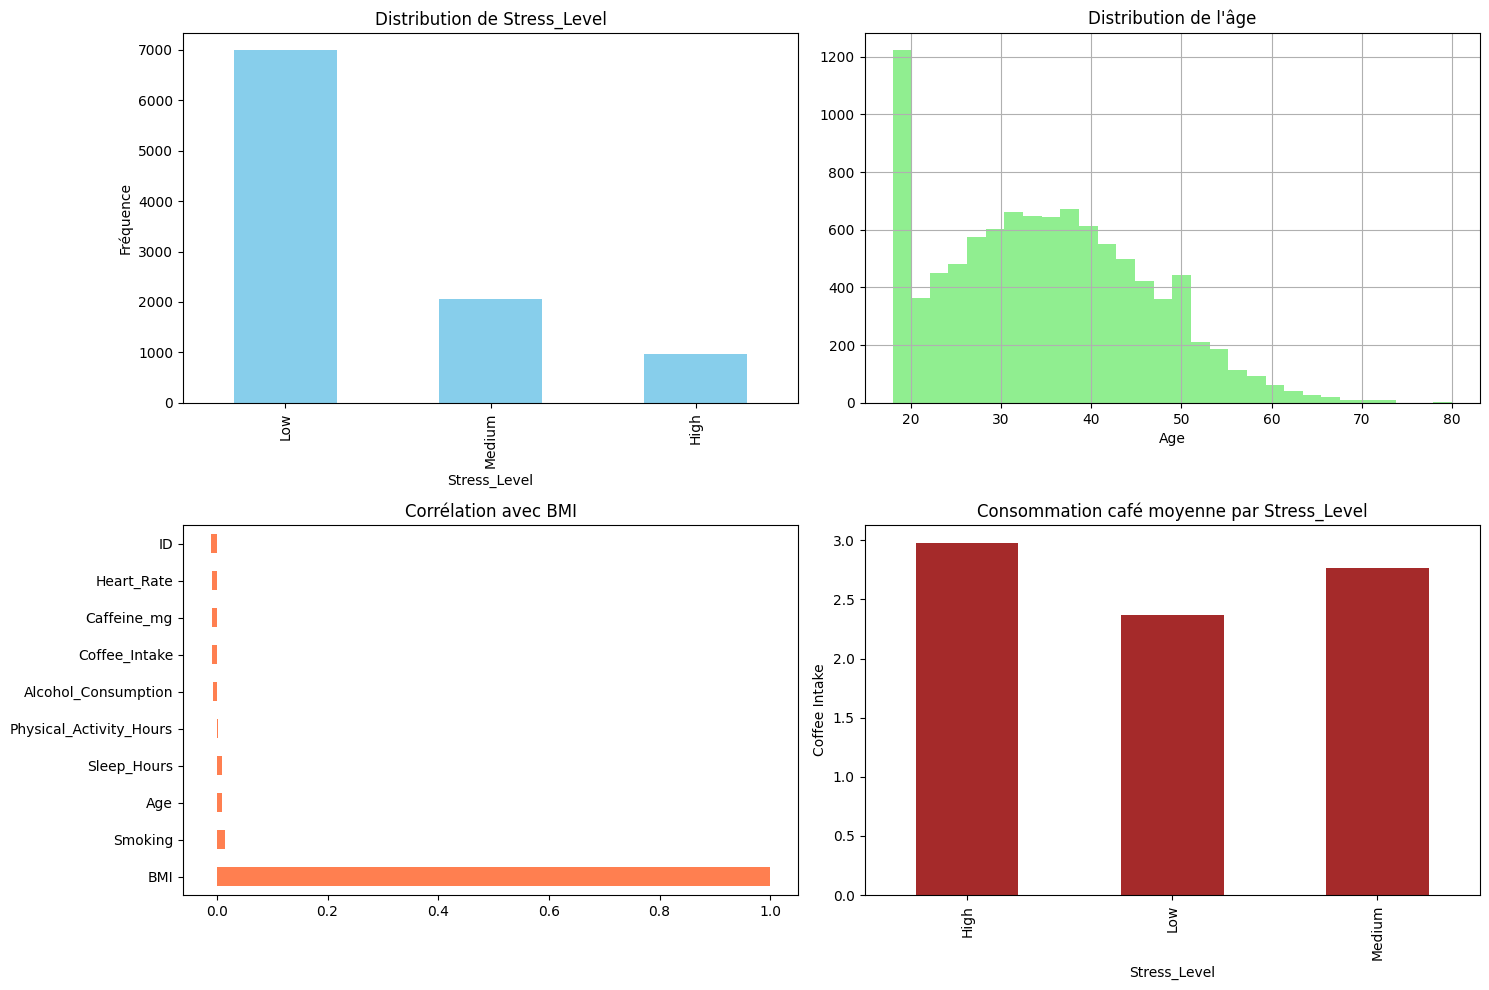

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TARGET = 'Stress_Level'  # CHOISISSEZ VOTRE VARIABLE CIBLE

print(f"\nDistribution de {TARGET}:")
print(df[TARGET].value_counts())
print(f"\nProportions:\n{df[TARGET].value_counts(normalize=True)}")

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution de la cible
df[TARGET].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title(f'Distribution de {TARGET}')
axes[0, 0].set_ylabel('Fréquence')

# Distribution de l'âge
df['Age'].hist(bins=30, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution de l\'âge')
axes[0, 1].set_xlabel('Age')

# Corrélation avec variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].corr()['BMI'].sort_values(ascending=False).plot(
    kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Corrélation avec BMI')

# Coffee_Intake vs Target
df.groupby(TARGET)['Coffee_Intake'].mean().plot(kind='bar', ax=axes[1, 1], color='brown')
axes[1, 1].set_title(f'Consommation café moyenne par {TARGET}')
axes[1, 1].set_ylabel('Coffee Intake')

plt.tight_layout()
plt.show()

## 2. Nettoyage des données 


In [4]:
null_data = df.isnull().sum()
print(null_data)

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [5]:

nan_data = df.isna().sum()
print(nan_data)

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


Nous voyons que les données manquants sont presents dans la colonne "Health Issues" mais nous pensons que c'est un type de données pour dire que la personne n'a pas des issues sur santé donc nous allons remplacé les valeurs manquants par None

In [7]:
health_issues_counts = df['Health_Issues']
print(health_issues_counts.value_counts())
print(health_issues_counts)
df["Health_Issues"] = df["Health_Issues"].fillna("None")

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
0           None
1           None
2           Mild
3           Mild
4           Mild
          ...   
9995    Moderate
9996        Mild
9997        None
9998        None
9999        None
Name: Health_Issues, Length: 10000, dtype: object
